In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os 
import shutil

In [10]:
path = 'C:\\Users\\daob\\Documents\\ComputerVision\\Final\\mcp'
binaryPath = 'C:\\Users\\daob\\Documents\\ComputerVision\\Final\\masks'
pathXTrain = 'C:\\Users\\daob\\Documents\\ComputerVision\\Final\\XTrain'
pathYTrain = 'C:\\Users\\daob\\Documents\\ComputerVision\\Final\\YTrain'
pathXTest = 'C:\\Users\\daob\\Documents\\ComputerVision\\Final\\XTest'

In [15]:
for image in os.listdir(pathYTrain):
    #print(image)
    imagePath = os.path.join(path, image)
    #print(imagePath)
    shutil.copy(imagePath, pathXTrain)

In [ ]:
for image in os.listdir(path):
    #img = cv2.imread(joint + str(x) + '.png')
    #############################     Gaussian Blurring    ######################################
    img = cv2.imread(os.path.join(path,image))
    medBlur = cv2.medianBlur(img,5)
    bilFilter = cv2.bilateralFilter(img,5,75,75)
    ret,thresh1 = cv2.threshold(bilFilter,127,255,cv2.THRESH_BINARY)
    #cv2.imshow('Binary Gaussian', thresh1)
    #name = 'binary_gaussian' + str(x) + '.png'
    #cv2.imwrite(name, thresh1)
    #cv2.waitKey(0)
    #############################     Filling     ######################################
    #img2 = cv2.imread(name)
    im_floodfill = thresh1.copy()
    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = thresh1.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);
    
    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)
    
    # Combine the two images to get the foreground.
    im_out = thresh1 | im_floodfill_inv
    # Make binary
    grayImage = cv2.cvtColor(im_out, cv2.COLOR_BGR2GRAY)
    (thresh, binaryFilled) = cv2.threshold(grayImage, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    cv2.imwrite(os.path.join(binaryPath , image), binaryFilled)
    #cv2.imshow("Foreground", binaryFilled)


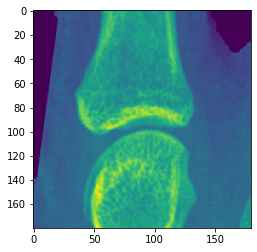

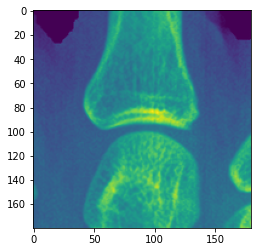

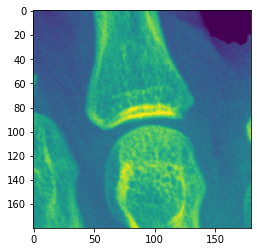

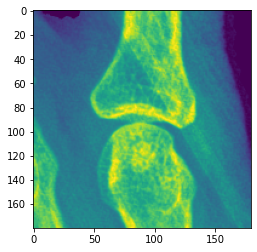

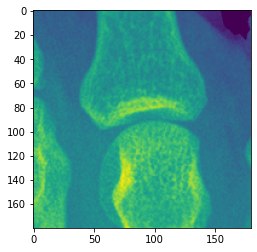

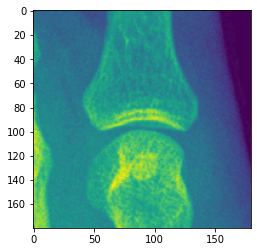

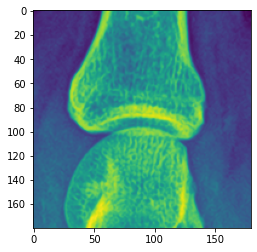

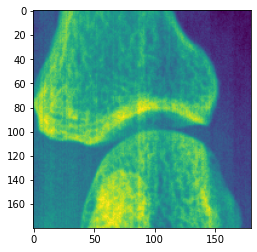

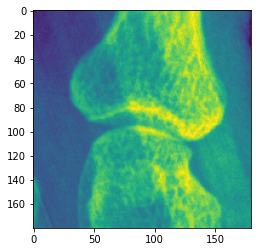

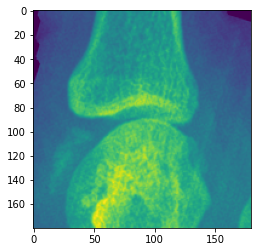

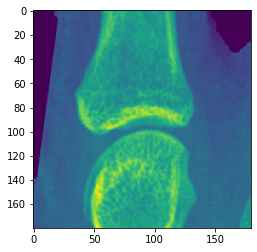

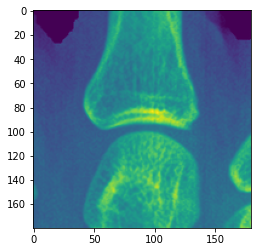

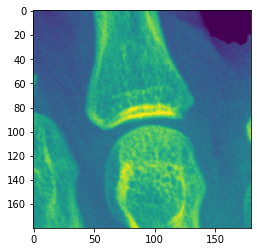

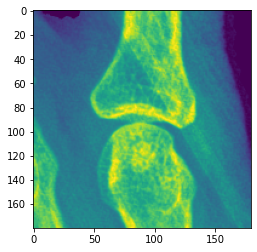

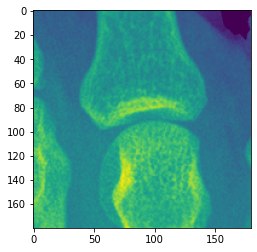

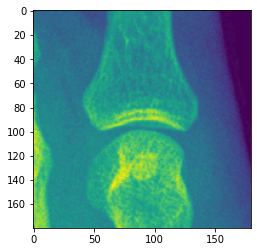

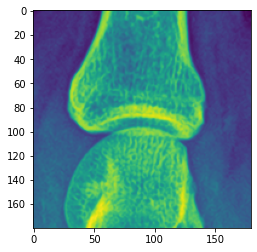

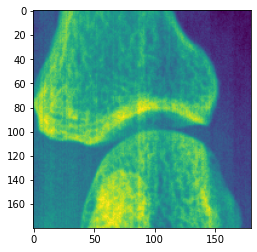

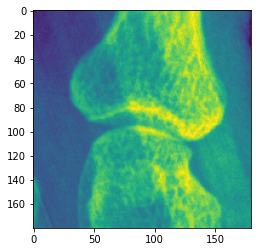

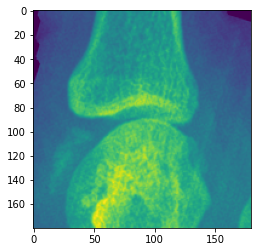

In [10]:
def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

import matplotlib.image as mpimg
train_dir = 'data\\training\\'
x = train_dir + 'XTrain'
y = train_dir + 'YTrain'
counter = 0
for img1,img2 in zip(os.listdir(x), os.listdir(y)):
    process(x + '\\' +img1)
    process(y + "\\" + img2)
    counter+=1
    if(counter > 9):
        break